# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [3]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [6]:
# YOUR CODE HERE
df = pd.read_csv("sharktank.csv")
df.head()



,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [8]:
# YOUR CODE HERE

# Change non-investing Sharks to 0
df.loc[ : , 'Corcoran' ] = df.loc[ : , 'Corcoran' ].fillna(0)
df.loc[ : , 'Cuban' ] = df.loc[ : , 'Cuban' ].fillna(0)
df.loc[ : , 'Greiner' ] = df.loc[ : , 'Greiner' ].fillna(0)
df.loc[ : , 'Herjavec' ] = df.loc[ : , 'Herjavec' ].fillna(0)
df.loc[ : , 'John' ] = df.loc[ : , 'John' ].fillna(0)
df.loc[ : , "O'Leary" ] = df.loc[ : , "O'Leary" ].fillna(0)
df.loc[ : , 'Harrington' ] = df.loc[ : , 'Harrington' ].fillna(0)
df.loc[ : , 'Guest' ] = df.loc[ : , 'Guest' ].fillna(0)
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [10]:
# YOUR CODE HERE

# Convert to strings to replace "$", ','
df [ 'Amount' ] = df [ 'Amount' ].fillna(0).astype(str)
df [ 'Amount' ] = df [ 'Amount' ].str.replace( '$' , '' )
df [ 'Amount' ] = df [ 'Amount' ].str.replace( ',' , '' )
# Convert again to float so we can operate
df.Amount = df.Amount.astype(float)

# Convert to strings to replace "%"
df [ 'Equity' ] = df [ 'Equity' ].fillna(0).astype(str)
df [ 'Equity' ] = df [ 'Equity' ].str.replace( '%' , '' )
# Convert again to float so we can operate
df.Equity = df.Equity.astype(float)

df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [13]:
# YOUR CODE HERE

# Keep companies that have equity
df = df [ df [ 'Equity' ] > 0 ]

# Perform operation to find out their value
df [ 'Valuation' ] = df [ 'Amount' ] / df [ 'Equity' ] * 100

# Reset for 'idxmax' to work right, reset and then after kept getting errors when kept
df = df.reset_index()

# Find company that is valued the most
df.iloc[ df [ 'Valuation' ].idxmax() ]

index                                                                421
Season                                                               6.0
No. in series                                                       11.0
Company                                                             Zipz
Deal                                                                 Yes
Industry                                               Food and Beverage
Entrepreneur Gender                                                 Male
Amount                                                         2500000.0
Equity                                                              10.0
Corcoran                                                             0.0
Cuban                                                                0.0
Greiner                                                              0.0
Herjavec                                                             0.0
John                                               

In [14]:
df.iloc[ df [ 'Amount' ].idxmax() ]

index                                                                483
Season                                                               6.0
No. in series                                                       27.0
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                         5000000.0
Equity                                                              50.0
Corcoran                                                             0.0
Cuban                                                                0.0
Greiner                                                              0.0
Herjavec                                                             1.0
John                                               

**YOUR EXPLANATION HERE**

The company that was most valuable was **Zipz**, they were valued at 25 million dollars.

No, the company given the most amount was **not the name**. The company given the most amount was AirCar, which recieved 5 million dollars. 

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [18]:
# ENTER CODE HERE.

num_sharks = df.loc[ : , 'Corcoran' : 'Guest' ].sum(axis=1)

df.loc[ : , 'Corcoran':'Guest' ] = df.loc[ : , 'Corcoran':'Guest' ].divide( num_sharks , axis=0)

df.loc[ : , 'Corcoran':'Guest' ] = df.loc[ : , 'Corcoran':'Guest' ].multiply( df [ 'Amount' ], axis=0)

df.loc[ : , 'Corcoran':'Guest' ].sum()

Corcoran       4912500.0
Cuban         17742500.0
Greiner        8132500.0
Herjavec      16110000.0
John           8116500.0
O'Leary        7365000.0
Harrington      800000.0
Guest           400000.0
dtype: float64

**YOUR EXPLANATION HERE**

The shark that invested the most was **Mark Cuban**, he invested $17,742,500.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

In [21]:
df.groupby('Industry')['Equity'].count()

Industry
Business Services         3
Children / Education     29
Consumer Products        10
Fashion / Beauty         43
Fitness / Sports         23
Food and Beverage        54
Green/CleanTech           5
Healthcare               10
Lifestyle / Home         36
Media / Entertainment     6
Pet Products              7
Software / Tech          13
Uncertain / Other         5
Name: Equity, dtype: int64

<Axes: title={'center': 'Funding Rate by Industry'}, xlabel='Industry'>

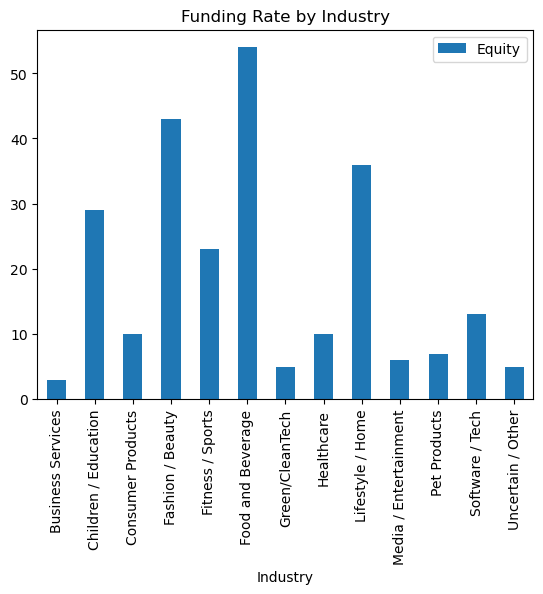

In [22]:
#creates a table for 'Industry' counts occurances as y value and industry for x
table = pd.pivot_table(data = df, values = 'Equity', index = ['Industry'], aggfunc = 'count')

#displays table a bar graph
table.plot(kind = 'bar', title = "Funding Rate by Industry")

The chart displays the types of industry along with the number of funded companies for each category. The bar chart displays this information with the y axis showing the number of funded companies. Food and beverage, Fashion / Beauty, and Lifestyle / Home have the highest number of investments showing the potential of favoritism towards these industries.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.